## Audio data analysis

Audio data analysis is about analyzing and understanding audio signals captured by digital devices, with numerous applications in the enterprise, healthcare, productivity, and smart cities. 

Auditory machine condition monitoring has been common in industrial settings for several decades. Seasoned maintenance experts can identify problems in the machines they monitor just by listening to them and realizing that “something doesn’t sound right.” With the advent of machine learning and big data, it is feasible to teach machines to detect anomalies sooner, to help predict when preventative maintenance might be necessary.

Other applications include:
* customer satisfaction analysis from customer support calls
* media content analysis and retrieval
* medical diagnostic aids and patient monitoring
* assistive technologies for people with hearing impairments
* public safety



## Audio File - Sampling
The sound excerpts are digital audio files in .wav format. Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second).

Sampling is the reduction of a continuous signal into a series of discrete values. The sampling frequency or rate is the number of samples taken over some fixed amount of time. A high sampling frequency results in less information loss but higher computational expense, and low sampling frequencies have higher information loss but are fast and cheap to compute.

## Loading an audit file
MIMII Dataset: Sound Dataset for Malfunctioning Industrial Machine Investigation and Inspection. (https://github.com/MIMII-hitachi/mimii_baseline)

This dataset is a sound dataset for malfunctioning industrial machine investigation and inspection (MIMII dataset). It contains the sounds generated from four types of industrial machines, i.e. valves, pumps, fans, and slide rails. Each type of machine includes seven individual product models*1, and the data for each model contains normal sounds (from 5000 seconds to 10000 seconds) and anomalous sounds (about 1000 seconds). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys

In [2]:
import IPython.display as ipd
import librosa.display

In [3]:
audio_data = './APPLAUSE.WAV'
x , sr = librosa.load(audio_data, sr=None) #disable resampling
print(type(x), type(sr))
print(x.shape, sr) #This returns an audio time series as a numpy array with a default sampling rate(sr) of 8KHZ, single channel 

<class 'numpy.ndarray'> <class 'int'>
(28015,) 8000


In [4]:
audio2_data = './LYNC_ringing.wav'
x2 , sr2 = librosa.load(audio2_data, sr=8000) 
print(type(x2), type(sr2))
print(x2.shape, sr2) #This returns an audio time series as a numpy array with a default sampling rate(sr) of 8KHZ, single channel 

<class 'numpy.ndarray'> <class 'int'>
(30000,) 8000


In [5]:
ipd.Audio(audio_data)

In [6]:
ipd.Audio(audio2_data)

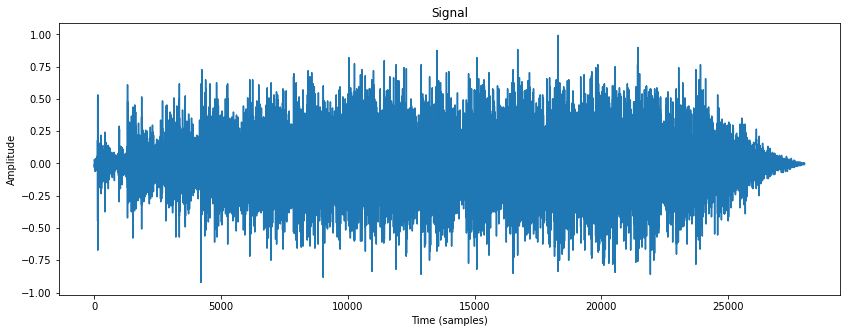

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(x);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

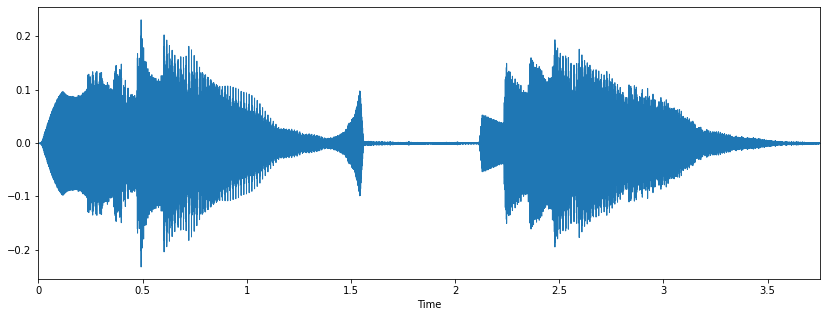

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr2)

## Fourier transform

* The Fourier transform is a mathematical formula that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude.
* The result is called a spectrum.Spectrogram as a bunch of FFTs stacked on top of each other.
![Fourier transform](ft.jpg "Fourier transform")

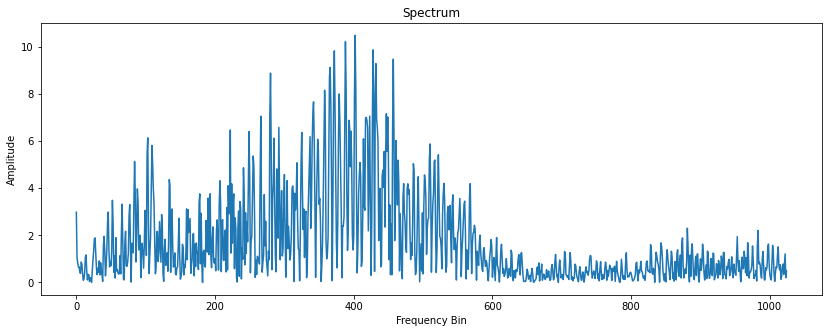

In [9]:
n_fft = 2048
ft = np.abs(librosa.stft(x[:n_fft], hop_length = n_fft+1))

plt.figure(figsize=(14, 5))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.show()

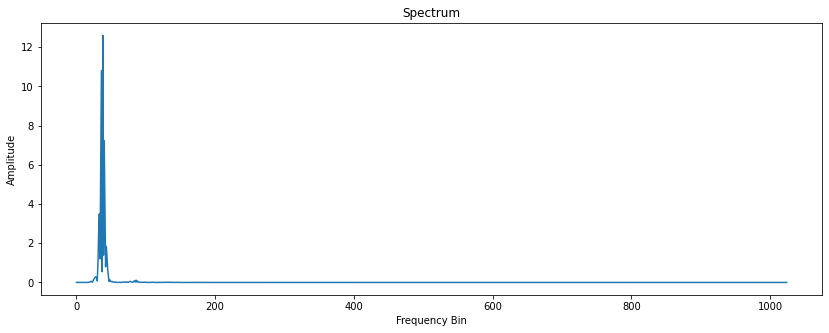

In [10]:
n_fft = 2048
ft = np.abs(librosa.stft(x2[:n_fft], hop_length = n_fft+1))

plt.figure(figsize=(14, 5))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.show()

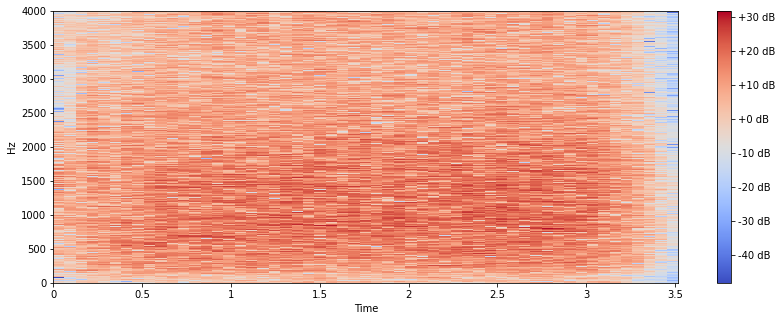

In [11]:
X = librosa.stft(x, hop_length=512) #short-time Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB') 
#The vertical axis shows frequencies (from 0 to 4kHz), and the horizontal axis shows the time of the clip. 

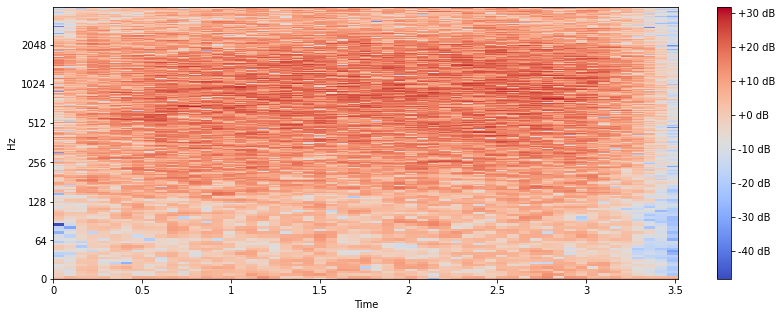

In [12]:
X = librosa.stft(x, hop_length=512) #short-time Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

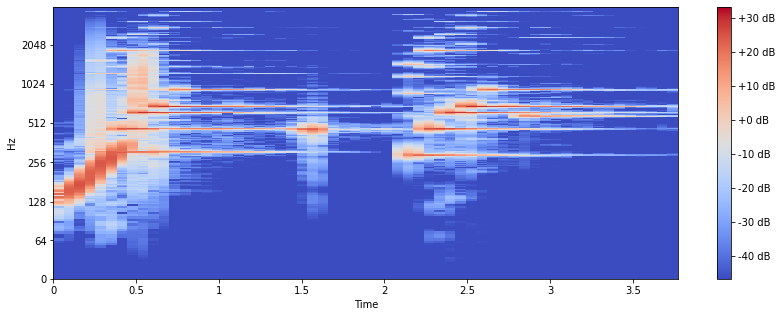

In [13]:
X2 = librosa.stft(x2, hop_length=512) #short-time Fourier transform
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

## Extract feature
 ### mel-scaled power (energy-squared) spectrogram
 A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.
 
 ### mel scale
 In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale.
 
 In actual practices, we can explore different features. 

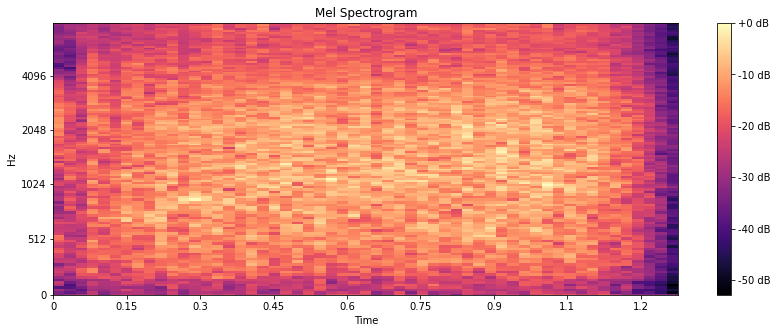

In [14]:
mel_spect = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=1024, hop_length=512, power=2.0)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

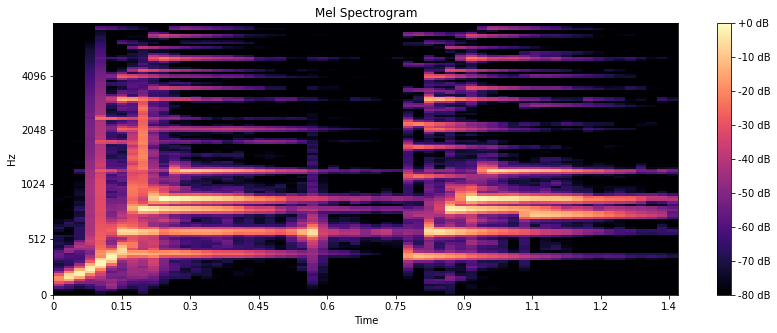

In [15]:
mel_spect2 = librosa.feature.melspectrogram(y=x2, sr=sr2, n_fft=1024, hop_length=512, power=2.0)
mel_spect2 = librosa.power_to_db(mel_spect2, ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spect2, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [16]:
mel_spect = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=1024, hop_length=512, power=2.0)
log_mel_spectrogram = 20.0 / 2.0 * np.log(mel_spect + sys.float_info.epsilon)
log_mel_spectrogram.shape

(128, 55)

## Define Neural Network
This is simple full connected network.
In actual project, we can cosnider auto-encode, CNN, or 2d LSTM

In [17]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten

Using TensorFlow backend.


In [18]:
model = keras.Sequential([
    Flatten(input_shape=(128, 55)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 7040)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               901248    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 909,569
Trainable params: 909,569
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.adam(learning_rate=0.01), metrics=['accuracy'])

In [21]:
#model.fit(X, y, epochs=150, batch_size=10)

# Evaluate Model

In [22]:
import sklearn.metrics as metrics

In [23]:
#test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
#score = metrics.roc_auc_score(test_y, model.predict(test_X))
#metrics.confusion_matrix(test_y, model.predict(test_X))